In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
lead_sample = pd.read_excel("raw-data/SW - All Lead WQ Samples (2010-18).xls")
valid_cols = [col for col in lead_sample.columns if col[0:7] != "Unnamed"]
lead_sample = lead_sample[valid_cols]
lead_sample.head()


,Sample Date Timestamp,Result Numeric Entry,DMA Name,DMA Id,RSZ Name,RSZ Id,RSZ Water System Id,RSZ Water System Name,Sample Point Matrix,Det Test Description,...,Street Postcode,District Postcode,Eastings,Northings,Region Name 2006,WOA Name,WOA Id,WSZ Name,WSZ Id,Site Name
0,2011-12-01 13:30:00,42.0,Abbey Drive DMA,DMA001829,Milngavie M4c,RSZ004060,WTW000182,MILNGAVIE WTW 2007 NS562760,POT_WATER,Lead,...,G14 9LY,G14,254269.0,667584.0,CLYDE,Milngavie & Balmore WOA,WOA000402,M4 Mugdock C WSZ,WSZ001641,UNKNOWN
1,2012-01-23 12:00:00,0.2,Abbey Drive DMA,DMA001829,Milngavie M4c,RSZ004060,WTW000182,MILNGAVIE WTW 2007 NS562760,POT_WATER,Lead,...,G14 9PD,G14,253988.0,667584.0,CLYDE,Milngavie & Balmore WOA,WOA000402,M4 Mugdock C WSZ,WSZ001641,UNKNOWN
2,2012-01-26 13:15:00,0.8,Abbey Drive DMA,DMA001829,Milngavie M4c,RSZ004060,WTW000182,MILNGAVIE WTW 2007 NS562760,POT_WATER,Lead,...,G14 9JJ,G14,254414.0,667890.0,CLYDE,Milngavie & Balmore WOA,WOA000402,M4 Mugdock C WSZ,WSZ001641,UNKNOWN
3,2013-04-13 11:10:53,0.4,Abbey Drive DMA,DMA001829,Milngavie M4c,RSZ004060,WTW000182,MILNGAVIE WTW 2007 NS562760,POT_WATER,Lead,...,G14 9LZ,G14,254248.0,667512.0,CLYDE,Milngavie & Balmore WOA,WOA000402,M4 Mugdock C WSZ,WSZ001641,UNKNOWN
4,2013-04-16 10:45:00,0.2,Abbey Drive DMA,DMA001829,Milngavie M4c,RSZ004060,WTW000182,MILNGAVIE WTW 2007 NS562760,POT_WATER,Lead,...,G14 9LY,G14,254238.0,667605.0,CLYDE,Milngavie & Balmore WOA,WOA000402,M4 Mugdock C WSZ,WSZ001641,MILNGAVIE M4C RSZ


In [3]:
comm_pipe = pd.read_excel("raw-data/SW - Comm pipe data.xls", dtype={"AR10_PROPERTYID":str})
valid_cols = [col for col in comm_pipe.columns if col[0:7] != "Unnamed"]
comm_pipe = comm_pipe[valid_cols]
comm_pipe.head()


,AR10_PROPERTYID,EASTING_NUM,NORTHING_NUM,AR10_MATERIAL,AR10_COMMS,MAIN_DISTANCE,FULL_ADDRESS,POST_TOWN,Street postcode,DISTRICT POSTCODE,...,Is the property age pre 1970?,Pipe Material,Specify If Other,Nearside or Farside?,Estimated length of pipe in meters,Comments,Material type changed,Incompete record,Material directly identifable?,Material identified by other means?
0,246447400672980100,246447400.0,672980100.0,MDPE,1,9.934,"7, KILPATRICK COURT, OLD KILPATRICK, GLASGOW, ...",GLASGOW,G605JA,G60,...,No,Poly,NaN,Nearside,1,NaN,0.0,2.0,No,Yes
1,246753900672904800,246753900.0,672904800.0,LEAD,1,17.914,"BALCLUTHA, STATION ROAD, OLD KILPATRICK, GLASG...",GLASGOW,G605LT,G60,...,Yes,Poly,NaN,Nearside,1,NaN,1.0,2.0,No,Yes
2,247747400671522100,247747400.0,671522100.0,LEAD,1,12.712,"7, WELLINGTON PLACE, CLYDEBANK, G81 4JN",CLYDEBANK,G814JN,G81,...,Yes,Copper,NaN,Nearside,1,cant locate s/c photo taken of s/c outside no 5,1.0,1.0,No,No
3,247793100671514100,247793100.0,671514100.0,LEAD,1,25.427,"16, WELLINGTON PLACE, CLYDEBANK, G81 4JN",CLYDEBANK,G814JN,G81,...,Yes,Copper,NaN,Nearside,1,cant locate s/c photo taken of s/c outside no 3,1.0,1.0,No,No
4,247503200671822500,247503200.0,671822500.0,MDPE,1,18.539,"25, DELHI AVENUE, CLYDEBANK, G81 4JS",CLYDEBANK,G814JS,G81,...,Yes,Poly,NaN,Farside,9,NaN,0.0,2.0,Yes,Yes


In [4]:
pipe_replacement = pd.read_csv("raw-data/SW - Lead Comm Pipe Replacements (2004-2018).csv")
valid_cols = [col for col in pipe_replacement.columns if col[0:7] != "Unnamed"]
pipe_replacement = pipe_replacement[valid_cols]
pipe_replacement.head()


,Work Order Id,Std Job No,WO Completed Status,WO Create Date,Ads Building Number,Ads Eastings,Ads Northings,Ads Operation Area,Ads Osapr,Street postcode,Ads Post Town,Ads Region,Ads Water Operational Area,Ads Water Supply Zone
0,17598,WRNW17,All Complete ...,08/04/2004,13,"211,416.00","774,804.00",North West,APHTGJ8X5X1540903G,PH336NS,FORT WILLIAM,North,Camisky Wellfield WOA,Cowhill WSZ
1,17613,WRNW17,All Complete with Comments ...,08/04/2004,NaN,"345,995.00","644,362.00",South East,APJ14X8J5HJ5M5A0MT,TD12QT,GALASHIELS,South,Manse Street Galashiels WOA,Stow WSZ
2,17631,WRNW17,All Complete ...,08/04/2004,11,"341,551.00","727,292.00",North East,APXE0F875RC4DTU05J,DD68HL,NEWPORT-ON-TAY,East,LHills & GFarg & Glendevon WOA,Newport WSZ
3,21435,WRNW17,All Complete ...,09/04/2004,119,"262,575.00","660,849.00",South West,APAQD18G5JF4W6QGW3,G733PH,GLASGOW,West,Milngavie WOA,C2 Craigmaddie WSZ
4,21934,WRNW17,All Complete ...,12/04/2004,1,"336,254.00","950,204.00",North West,APQUAQ825EJ5QYE0DT,KW15NN,WICK,North,Loch Calder WOA,Toftcarl WSZ


In [5]:
phosphate_dosing = pd.read_excel("raw-data/SW - Phosphate Dosing WTWs Y or N.xlsx")
valid_cols = [col for col in phosphate_dosing.columns if col[0:7] != "Unnamed"]
phosphate_dosing = phosphate_dosing[valid_cols]
phosphate_dosing.head()


,WTW Name,WTW Name (Code),Phosphate Dosing on Site?
0,ACHARACLE WTW,ACHARACLE WTW 2008 NM664673,No
1,ACHILTIBUIE WTW,ACHILTIBUIE WTW 2003 NC044062,No
2,ACHMELVICH WTW,ACHMELVICH WTW 1970 NC067252,No
3,ACHNASHEEN WTW,ACHNASHEEN WTW 2003 NH161587,No
4,AFTON WTW,AFTON WTW NS627056,Yes


In [6]:
postcode = pd.read_excel("raw-data/SW - Postcodes linked to SW Zonal Structure.xlsb", engine="pyxlsb")
valid_cols = [col for col in postcode.columns if col[0:7] != "Unnamed"]
postcode = postcode[valid_cols]
postcode.head()


,Trim Postcode,WOA_ID,WOA_Name,RSZ_ID,RSZ_Name,WSZ_ID,WSZ_Name,DMA_ID,DMA_Name,Virtual_DMA_ID,Virtual_DMA_Name,Count,Current DMA?,WOA/RSZ/WSZ?,Total properties
0,AB101AA,WOA000199,Invercannie & Mannofield WOA,RSZ001029,Mannofield East,WSZ001061,Mannofield WSZ,DMA006865,George Street & King Street DMA,DMA006865,George Street & King Street DMA,NaN,NaN,NaN,3020.0
1,AB101AB,WOA000199,Invercannie & Mannofield WOA,RSZ001031,Mannofield South,WSZ000037,Airyhall WSZ,DMA004023,Whitehall DMA (DMA004023),DMA004023,Whitehall DMA (DMA004023),NaN,NaN,NaN,2440.0
2,AB101AF,WOA000199,Invercannie & Mannofield WOA,RSZ001029,Mannofield East,WSZ001061,Mannofield WSZ,DMA006865,George Street & King Street DMA,DMA006865,George Street & King Street DMA,NaN,NaN,NaN,3020.0
3,AB101AG,WOA000199,Invercannie & Mannofield WOA,RSZ001029,Mannofield East,WSZ001061,Mannofield WSZ,DMA006865,George Street & King Street DMA,DMA006865,George Street & King Street DMA,NaN,NaN,NaN,3020.0
4,AB101AH,WOA000199,Invercannie & Mannofield WOA,RSZ001031,Mannofield South,WSZ000037,Airyhall WSZ,DMA004023,Whitehall DMA (DMA004023),DMA004023,Whitehall DMA (DMA004023),NaN,NaN,NaN,2440.0


In [7]:
phosphate_level_N = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls", sheet_name="North", header=None)
phosphate_level_N.head()
phosphate_level_S = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls", sheet_name="South", header=None)
phosphate_level_S.head()
phosphate_level_E = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls", sheet_name="East", header=None)
phosphate_level_E.head()
phosphate_level_W = pd.read_excel("raw-data/SW - Scottish Water Zonal Phosphate Levels.xls", sheet_name="West", header=None)
phosphate_level_W.head()


,0,1,2,3,4,5,6,7,8,9
0,NaN,Sample Date from:,NaN,01/08/2018,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Sample Date to:,NaN,31/07/2019,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,WEST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
household_count = pd.read_csv("raw-data/Other - Postcode_ household count_ urban class.csv")
valid_cols = [col for col in household_count.columns if col[0:7] != "Unnamed"]
household_count = household_count[valid_cols]
household_count.head()


,Street postcode,District postcode,Sector postcode,DateOfIntroduction,DateOfDeletion,YearOfDeletion,GridReferenceEasting,GridReferenceNorthing,Latitude,Longitude,...,RegistrationDistrict2007Code,ROACommunityPlanningPartnership2006Code,ROALocal2006Code,StrategicDevelopmentPlanningArea2013Code,TravelToWorkArea2011Code,UrbanRural6Fold2016Code,UrbanRural8Fold2016Code,GridLinkIndicator,GridLinkPositionalAccuracy,NeverDigitised
0,AB452NL,AB45,AB45 2,01/08/1990 00:00,ND,ND,365169,865455,57.677605,-2.585697,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
1,AB452NN,AB45,AB45 2,01/08/1990 00:00,ND,ND,365369,865449,57.677567,-2.582343,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
2,AB452NP,AB45,AB45 2,01/08/1990 00:00,ND,ND,365475,865493,57.677970,-2.580572,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
3,AB452NW,AB45,AB45 2,12/07/1996 00:00,ND,ND,365743,865547,57.678476,-2.576086,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN
4,AB452PJ,AB45,AB45 2,01/08/1990 00:00,ND,ND,358760,866116,57.682999,-2.693262,...,S12000034,NaN,NaN,S11000001,S22000081,6,7,Y,1.0,NaN


In [9]:
property_age_data = pd.read_csv("raw-data/Other - SAA_PropertyAgeData.csv", engine="c", encoding="Latin-1")
valid_cols = [col for col in property_age_data.columns if col[0:7] != "Unnamed"]
property_age_data = property_age_data[valid_cols]
property_age_data.head()


,UPRN,Postcode,Building_Type,Age_Year,Age_Category,XCOORD,YCOORD
0,116000269.0,TD1 3SG,Detached,2002.0,NaN,351620.0,634825.0
1,116000270.0,TD1 3SG,Detached,2003.0,NaN,351612.0,634831.0
2,116000271.0,TD1 3SG,Detached,2003.0,NaN,351599.0,634836.0
3,116000272.0,TD1 3SG,Detached,2002.0,NaN,351588.0,634843.0
4,116000273.0,TD1 3SG,Detached,2003.0,NaN,351582.0,634851.0


In [10]:
UK_HPI = pd.read_csv("raw-data/Other - UK-HPI-full-file-2019-03.csv")
valid_cols = [col for col in UK_HPI.columns if col[0:7] != "Unnamed"]
UK_HPI = UK_HPI[valid_cols]
UK_HPI.head()


,Date,Year2,RegionName,CouncilArea2018Code,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
output = pd.read_csv('processed-data/processed_data.csv')



In [13]:
output.head()


,post_code,rig - PH value,rig - Lead µgPb/l,rig - Phosphorus µgP/l,rig - Temperature °C,sample - lead µgPb/l,comm pipe - main distance,comm pipe - commission year,comm pipe - identification confidence,comm pipe - leakage,comm pipe - property pre 1970,comm pipe - lead pipe ratio,comm pipe - ar10 lead pipe ratio,HPI - Average House Price,HPI - Estimated post 1970 ratio,replacement - any_replacement,replacement - success_replacement_count
0,AB101AA,8.29,8.67,743.1,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
1,AB101AB,8.29,8.67,743.1,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
2,AB101AF,8.29,8.67,743.1,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
3,AB101AG,8.29,8.67,743.1,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
4,AB101AH,8.29,8.67,743.1,20.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0


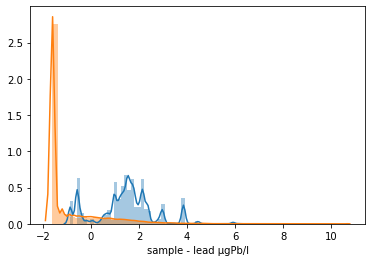

In [14]:
fig, ax = plt.subplots(1, 1)
sns.distplot(np.log(output['rig - Lead µgPb/l']), ax=ax)
sns.distplot(np.log(output['sample - lead µgPb/l']), ax=ax)
plt.show()


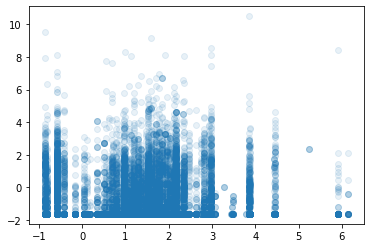

In [15]:
plt.scatter(np.log(output['rig - Lead µgPb/l']),
            np.log(output['sample - lead µgPb/l']), alpha=0.1)